# Ejercicio N°2

## Análisis de incendios por provincia

### Instrucciones:
Lea en *Colab* el archivo `incendios-cantidad-causas-provincia_2022.csv` y realice cualquier tarea de limpieza y/o adecuación del dataset que considere necesaria.

### Actividades:

1. Obtenga el número de incendios totales por año **para todo el país**.
   ¿Cuál fue el año en el que se presentó un mayor número de incendios?

2. Obtenga el número de incendios totales por año para el período 1993-2021
   **en la provincia de Córdoba**.

3. Realice una tabla en la que se muestre, para cada año del periodo 1993-2021,
   la provincia en la que tuvo lugar el mayor número de incendios intencionales.
   *Sugerencia:* explore las funcionalidades del método `idxmax()` de la librería Pandas.

4. Realice un gráfico de barras para visualizar el número de incendios intencionales,
   por negligencia y naturales que tuvieron lugar durante el periodo 2015-2021
   en la provincia de Santa Fe.

5. Obtenga el número promedio de incendios intencionales, por negligencia y naturales
   para la provincia de Río Negro durante el periodo 1993-2021.

- [x] Limpieza de datos (`Cordoba` -> `Córdoba`; "` Santa Fe`", "`Santa Fe `" -> `Santa Fe`).
- [x] La columna `natural` es de tipo object, es decir tiene valores str.
  - [x] Encontrar valores vacíos que no son NaN.
  - [x] Convertir a formato numérico con `pd.to_numeric(df["natural"])`


In [1]:
import pandas as pd
df = pd.read_csv('/content/incendios-cantidad-causas-provincia_2022.csv', encoding='ISO-8859-1', header=3)
pd.set_option('display.max_rows', None)
# Limpieza de datos (Cordoba -> Córdoba; " Santa Fe", "Santa Fe " -> Santa Fe)
df["provincia"] = df["provincia"].replace({
    "Santa Fe ": "Santa Fe",
    " Santa Fe": "Santa Fe",
    "Cordoba" : "Córdoba"
})
df["natural"] = df["natural"].replace("-", pd.NA)
df["natural"] = pd.to_numeric(df["natural"])

In [2]:
df.head(7)

,anio,provincia,total,negligencia,intencional,natural,desconocida
0,1993,Buenos Aires,0,0,0,0.0,0
1,1993,Catamarca,0,0,0,0.0,0
2,1993,Chaco,0,0,0,0.0,0
3,1993,Chubut,21,18,0,0.0,3
4,1993,Córdoba,151,0,0,0.0,151
5,1993,Corrientes,48,0,0,0.0,48
6,1993,Entre Ríos,179,0,0,0.0,179


1. Obtenga el número de incendios totales por año **para todo el país**.
   ¿Cuál fue el año en el que se presentó un mayor número de incendios?

In [3]:
incendios_por_anio = df.groupby("anio")["total"].sum()
maximo_incendios_en_un_año = incendios_por_anio.max()
año_con_mas_incendios = incendios_por_anio.idxmax()
print(incendios_por_anio)
print("El año con más incendios fue", año_con_mas_incendios, "con un total de", maximo_incendios_en_un_año, "incendios.")

anio
1993      538
1994      852
1995     4145
1996     4057
1997     4660
1998     8681
1999    10487
2000    10559
2001     7839
2002    10566
2003    12191
2004    12629
2005    17260
2006    11321
2007    10994
2008    17682
2009    10309
2010     7504
2011     6738
2012     5599
2013     6684
2014     6951
2015     6045
2016     7478
2017     7414
2018     9136
2019     6429
2020    10477
2021     6209
Name: total, dtype: int64
El año con más incendios fue 2008 con un total de 17682 incendios.


2. Obtenga el número de incendios totales por año para el período 1993-2021
   **en la provincia de Córdoba**.

In [4]:
incendios_por_anio_cordoba = df[df["provincia"] == "Córdoba"][["anio", "total"]].reset_index(drop=True)
print(incendios_por_anio_cordoba)

    anio  total
0   1993    151
1   1994    161
2   1995   2441
3   1996     92
4   1997    387
5   1998    307
6   1999     55
7   2000    869
8   2001    194
9   2002    101
10  2003    119
11  2004    154
12  2005    763
13  2006    438
14  2007    346
15  2008    157
16  2009    229
17  2010    192
18  2011    147
19  2012    135
20  2013    173
21  2014    291
22  2015      3
23  2016    283
24  2017    282
25  2018    295
26  2019    273
27  2020    264
28  2021    198


3. Realice una tabla en la que se muestre, para cada año del periodo 1993-2021,
   la provincia en la que tuvo lugar el mayor número de incendios intencionales.
   *Sugerencia:* explore las funcionalidades del método `idxmax()` de la librería Pandas.

In [5]:
df.loc[df.groupby("anio")["intencional"].idxmax(), ["anio", "provincia"]]

,anio,provincia
21,1993,Tierra del Fuego
37,1994,Río Negro
60,1995,Río Negro
70,1996,Catamarca
105,1997,Río Negro
114,1998,Buenos Aires
138,1999,Chaco
161,2000,Chaco
185,2001,Chaco
207,2002,Buenos Aires


4. Realice un gráfico de barras para visualizar el número de incendios intencionales,
   por negligencia y naturales que tuvieron lugar durante el periodo 2015-2021
   en la provincia de Santa Fe.

<Axes: xlabel='anio'>

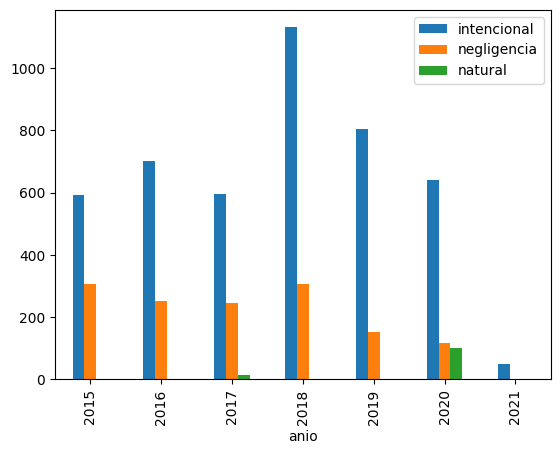

In [6]:
# filtrado de datos
df_santafe = df[(df["provincia"] == "Santa Fe") & (df["anio"].between(2015, 2021))]
df_santafe = df_santafe[["anio", "intencional", "negligencia", "natural"]]
df_santafe.set_index("anio").plot(kind="bar")

5. Obtenga el número promedio de incendios intencionales, por negligencia y naturales
   para la provincia de Río Negro durante el periodo 1993-2021.

In [7]:
df_rionegro = df[(df["provincia"] == "Río Negro") & (df["anio"].between(1993, 2021))]
df_rionegro[["intencional", "negligencia", "natural"]].mean()

,0
intencional,343.758621
negligencia,240.965517
natural,20.296296


In [18]:
df_rn = df[(df["provincia"] == "Río Negro") & (df["anio"].between(1993, 2021))]
df[(df["provincia"] == "Río Negro")][["","negligencia","intencionalnatural"]].mean()

,0
natural,20.296296
negligencia,240.965517
intencional,343.758621
